In [1720]:
%matplotlib inline

from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=2)
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from sklearn.metrics import r2_score

In [1721]:
#Load data
# Base directory for the data
base_directory = 'C:/Users/Zehao Liu/OneDrive - Imperial College London/Reseaerch/Tibials Anterior Fatigue Experiment/TA fatigue model setting experiment'

# List of individual names
individuals = ['Ming']  # Replace with actual names
#individuals = ['Zehao03','Shibo03','Seb','Qingyue','Ruohan','Zehaoleft','Kursad','Pengda','Reneira','Ting','Zeyuan','Shuchang','Zehao06','Ming']#,'Lucas','Boxiao','Yixing','Quan']
# File suffixes for each type of data
pmmg_suffix = 'pmmg_mean_normalized_time.csv'
# mmmg_rms_suffix = 'mmmg_rms_normalized_time.csv'
pmmg_force_suffix = 'pmmg_mean_normalized_meanforce_withforce.csv'
force_suffix = 'force_mean_normalized_time.csv'

In [1722]:
#Function cell
# Function for the fitting model (e.g., linear)
# Curve fitting models
def linear_model(x, a, b):
    return a * x + b

def polynomial_model_2nd(x, a, b, c):
    return a * x**2 + b * x + c

def polynomial_model_3rd(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exponential_model_double(x, a, b, c, d, e):
    return a * np.exp(b * (-x)) + c * np.exp(d * (-x)) + e #* np.exp(f * (-x)) 

def logarithmic_model(x, a, b, c):
    return a * np.log(b * x + c)

def exponential_model_single(x, a, b, c, d, e, f):
    return a * np.exp(b * (-x+d)) + c

def moving_average(data, window_size):
    """
    Calculate the moving average of a 1D ndarray.
    
    Parameters:
        data (ndarray): The input 1D array.
        window_size (int): The size of the moving window.
        
    Returns:
        ndarray: The moving average of the input data.
    """
    cumsum = np.cumsum(np.insert(data, 0, 0)) 
    return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


[0.59951169 0.02443318 0.33983647 0.46187569 0.10870342]


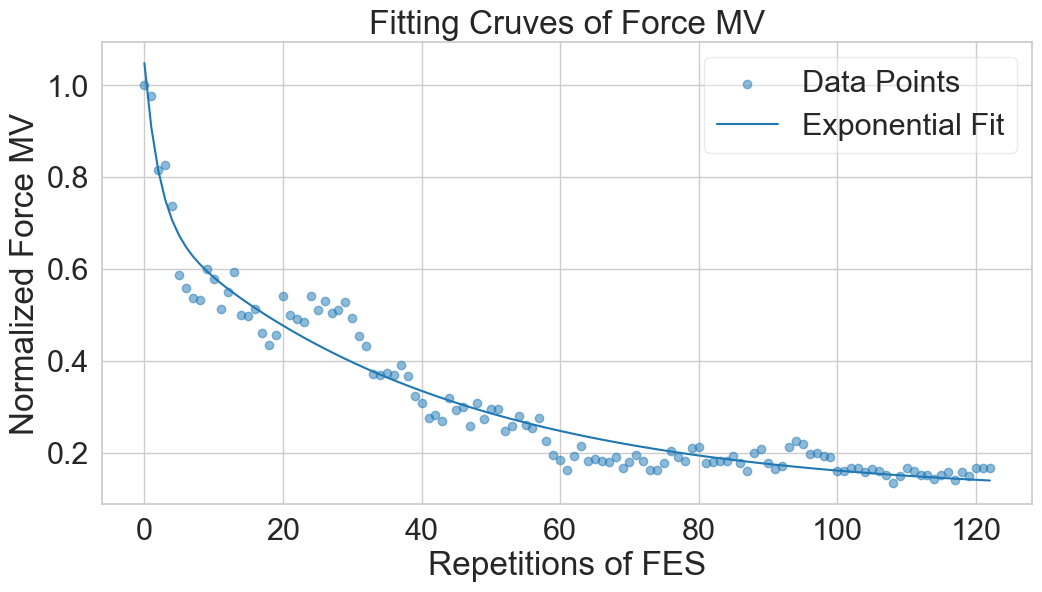

In [1723]:
# Fit and plot data for each individual
#plt.figure(figsize=(12, 6))
for individual in individuals:
    plt.figure(figsize=(12, 6))
    file_path = os.path.join(base_directory, individual, force_suffix)
    df = pd.read_csv(file_path)
    time_values = df.index  # Use index as the x-axis
    force_values = df.iloc[:, 0]  # Assuming the force values are in the first column
    # Rescale force_values to the 0-1 range
    force_min = force_values.min()
    force_max = force_values.max()
    force_values = force_values / force_max 
    # Fit different models
    force_params_exp, _ = curve_fit(exponential_model_double, time_values, force_values, maxfev=10000)
    #tendon_params_exp,_ = curve_fit(exponential_model_double, time_values, force_values, maxfev=10000)
    
    np.set_printoptions(suppress = True)
    print(force_params_exp)

    # Plot data
    plt.scatter(time_values, force_values, label='Data Points', alpha=0.5)

    # Plot fitted lines
    plt.plot(time_values, exponential_model_double(time_values, *force_params_exp), label='Exponential Fit')
    
    # Adjust the legend's size and location
    plt.title('Fitting Cruves of Force MV')
    plt.xlabel('Repetitions of FES')
    plt.ylabel('Normalized Force MV')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
    plt.grid(True)
    plt.savefig('Different Fitting Cruves of Force MV.pdf', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.savefig('Different Fitting Cruves of Force MV.png', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.show()

C:\Users\Zehao Liu\AppData\Local\Temp\ipykernel_28996\3282392958.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  pmmg_params_exp, _ = curve_fit(exponential_model_single, time_values, pmmg_values, maxfev=20000)


[ 0.5608967   0.01130491  0.27411409 -2.23955283  1.          1.        ]


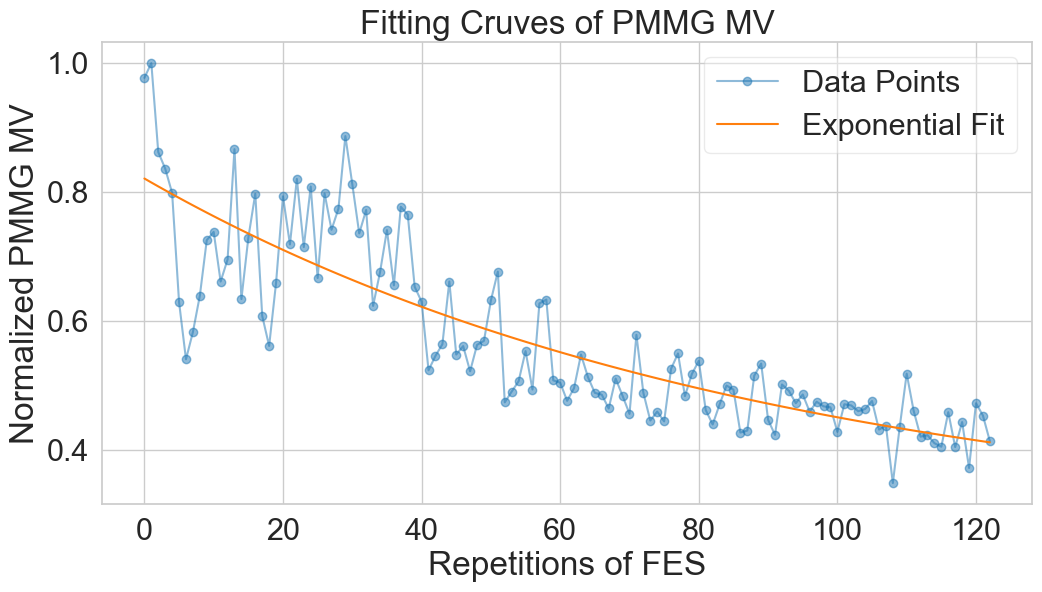

In [1724]:
# Fit and plot data for each individual
#plt.figure(figsize=(12, 6))
for individual in individuals:
    plt.figure(figsize=(12, 6))
    file_path = os.path.join(base_directory, individual, pmmg_suffix)
    df = pd.read_csv(file_path)
    time_values = df.index  # Use index as the x-axis
    pmmg_values = df.iloc[:, 0]  # Assuming the EMG values are in the first column
    # Rescale emg_values to the 0-1 range
    pmmg_min = pmmg_values.min()
    pmmg_max = pmmg_values.max()
    pmmg_values = (pmmg_values / pmmg_max) #* 248 / 113 * 9.8 
    # Fit different models
    
    pmmg_params_exp, _ = curve_fit(exponential_model_single, time_values, pmmg_values, maxfev=20000)

    
    np.set_printoptions(suppress = True)
    print(pmmg_params_exp)
    # Plot data
    plt.plot(time_values, pmmg_values, marker = 'o', linestyle = '-', label='Data Points', alpha=0.5)

    # Plot fitted lines
    plt.plot(time_values, exponential_model_single(time_values, *pmmg_params_exp), label='Exponential Fit')

    # Adjust the legend's size and location
    plt.title('Fitting Cruves of PMMG MV')
    plt.xlabel('Repetitions of FES')
    plt.ylabel('Normalized PMMG MV')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
    plt.grid(True)
    plt.savefig('Different Fitting Cruves of PMMG MV.pdf', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.savefig('Different Fitting Cruves of PMMG MV.png', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.show()

[ 51.22216025  -0.37728409   0.         -29.70193961 -56.83087791]


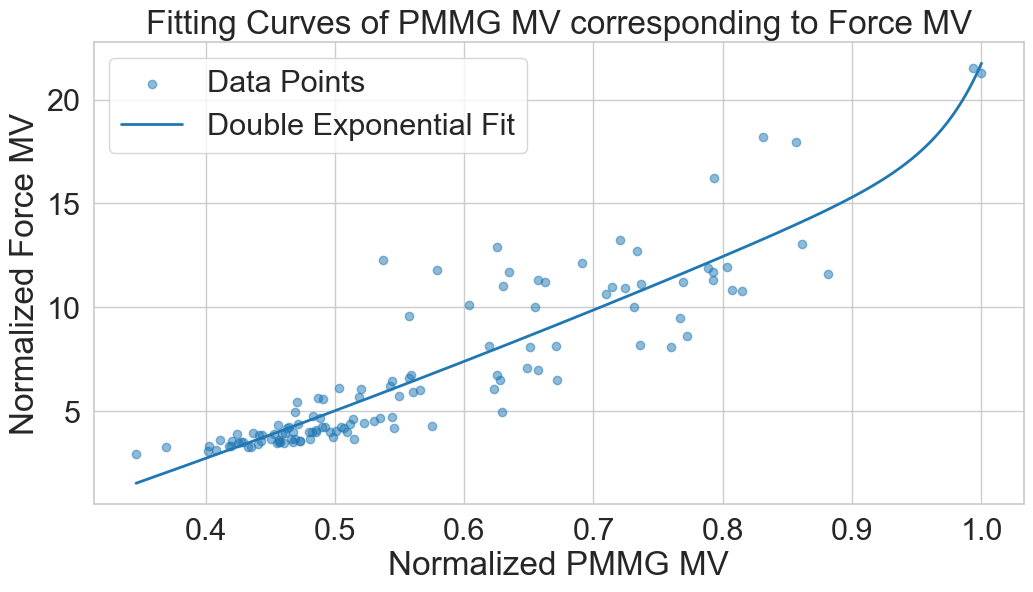

In [1725]:
# Fit and plot data for each individual
for individual in individuals:
    plt.figure(figsize=(12, 6))

    file_path = os.path.join(base_directory, individual, pmmg_force_suffix)
    df = pd.read_csv(file_path)
    force_values = df.iloc[:, 0]
    emg_values = df.iloc[:, 1]
    force_max = force_values.max()
    force_values = (force_values / force_max) * 248 / 113 * 9.8 
    emg_max = emg_values.max()
    emg_values = emg_values / emg_max


    # Fit different models
    #params_linear, _ = curve_fit(linear_model, emg_values, force_values, maxfev=10000)
    #params_poly_2nd, _ = curve_fit(polynomial_model_2nd, emg_values, force_values, maxfev=10000)
    #params_poly_3rd, _ = curve_fit(polynomial_model_3rd, emg_values, force_values, maxfev=10000)
    #params_exp_single, _ = curve_fit(exponential_model_single, emg_values, force_values, maxfev=10000)
    pmmg_force_exp_double, _ = curve_fit(exponential_model_double, emg_values, force_values, maxfev=10000)
    #params_log, _ = curve_fit(logarithmic_model, emg_values, force_values, maxfev=10000)
    #print(params_linear)
    #print(params_poly_2nd)
    #print(params_poly_3rd)
    print(pmmg_force_exp_double)
    #print(params_log)

    # r2_linear = r2_score(force_values, linear_model(emg_values, *params_linear))
    # r2_poly_2nd = r2_score(force_values, polynomial_model_2nd(emg_values, *params_poly_2nd))
    # r2_poly_3rd = r2_score(force_values, polynomial_model_3rd(emg_values, *params_poly_3rd))
    # r2_exp_single = r2_score(force_values, exponential_model_single(emg_values, *params_exp_single))
    # r2_exp_double = r2_score(force_values, exponential_model_double(emg_values, *params_exp_double))
    #r2_log = r2_score(emg_values, logarithmic_model(time_values, *pmmg_params_log))

    # print(f"Linear Model R^2: {r2_linear}")
    # print(f"2nd Polynomial Model R^2: {r2_poly_2nd}")
    # print(f"3rd Polynomial Model R^2: {r2_poly_3rd}")
    # print(f"Single Exponential Model R^2: {r2_exp_single}")
    # print(f"Double Exponential Model R^2: {r2_exp_double}")

    emg_values_dense = np.linspace(min(emg_values), max(emg_values), 500)
    # Plot data
    plt.scatter(emg_values, force_values, label='Data Points', alpha=0.5)

    # Plot fitted lines
    #plt.plot(emg_values_dense, linear_model(emg_values_dense, *params_linear), label='Linear Fit', linewidth=2)
    #plt.plot(emg_values_dense, polynomial_model_2nd(emg_values_dense, *params_poly_2nd), label='2nd Order Poly Fit', linewidth=2)
    #plt.plot(emg_values_dense, polynomial_model_3rd(emg_values_dense, *params_poly_3rd), label='3rd Order Poly Fit', linewidth=2)
    #plt.plot(emg_values_dense, exponential_model_single(emg_values_dense, *params_exp_single), label='Single Exponential Fit', linewidth=2)
    plt.plot(emg_values_dense, exponential_model_double(emg_values_dense, *pmmg_force_exp_double), label='Double Exponential Fit', linewidth=2)
    #plt.plot(emg_values_dense, logarithmic_model(emg_values_dense, *params_log), label=f'{individuals} Logarithmic Fit')

    plt.title('Fitting Curves of PMMG MV corresponding to Force MV')
    plt.xlabel('Normalized PMMG MV')
    plt.ylabel('Normalized Force MV')
    plt.legend()
    plt.grid(True)
    plt.show()

Hill-type muscle model
Elements
The model consists of three elements:

A contractile element (CE) that represents the muscle fibers that contract based on the muscle activation state.
A serial elastic element (SEE) that represents the tendons that connect the muscle to the bones.
A parallel elastic element (PEE) that represents the passive elastic material surrounding muscle fibers.

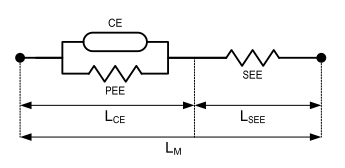

In [1726]:
Image(filename='muscle_model.png')

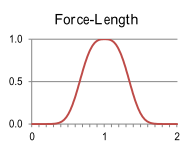

In [1727]:
Image(filename='force_length.png')

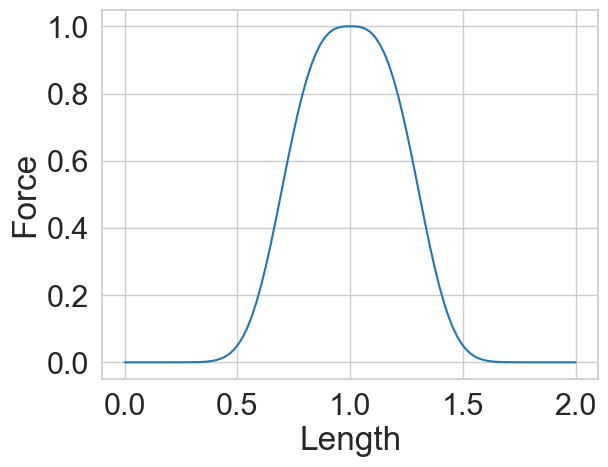

In [1728]:

c = np.log(0.05)
L_CE_opt = 1.0
w = 0.5

def f_L(L_CE_norm):
    return np.exp(c * np.power(np.absolute((L_CE_norm - L_CE_opt) / (L_CE_opt * w)), 3.0))
f_L = np.vectorize(f_L)

L_CE_norm = np.linspace(0, 2, 100)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Length')
ax.set_ylabel('Force')
ax.plot(L_CE_norm, f_L(L_CE_norm))

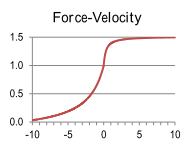

In [1729]:
Image(filename='force_velocity.png')

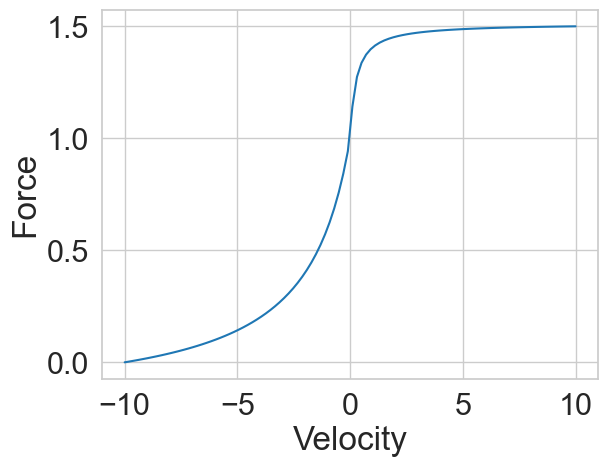

In [1730]:

V_max = -10.0
K = 5.0
N = 1.5

def f_V(V_CE_norm): 
    if V_CE_norm < 0:
        return (V_max - V_CE_norm) / (V_max + (K * V_CE_norm))
    else:
        return N + (N - 1) * ((V_max + V_CE_norm) / ((7.56 * K * V_CE_norm) - V_max))
f_V = np.vectorize(f_V)

V_CE_norm = np.linspace(-10, 10, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Velocity')
ax.set_ylabel('Force')
ax.plot(V_CE_norm, f_V(V_CE_norm))

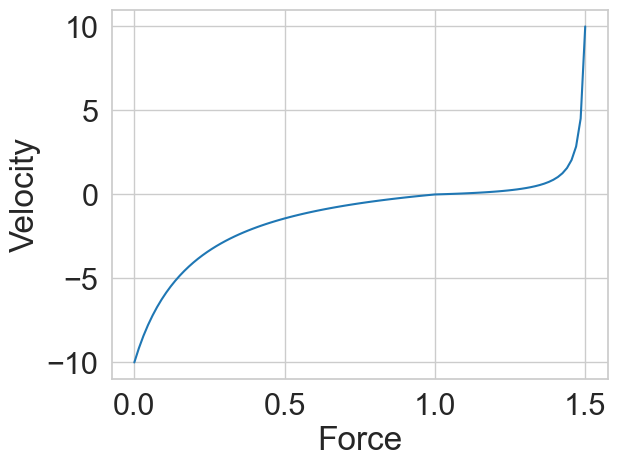

In [1731]:

def f_V_inv(y):
    if y < 1:
        return (V_max * (1 - y)) / (1 + (y * K))
    else:
        return (V_max * (y - 1)) / ((7.56 * K * (y - N)) - N + 1)
f_V_inv = np.vectorize(f_V_inv)

y = np.linspace(0, 1.5, 100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Force')
ax.set_ylabel('Velocity')
ax.plot(y, f_V_inv(y))

Text(0.5, 0, 'F_CE')

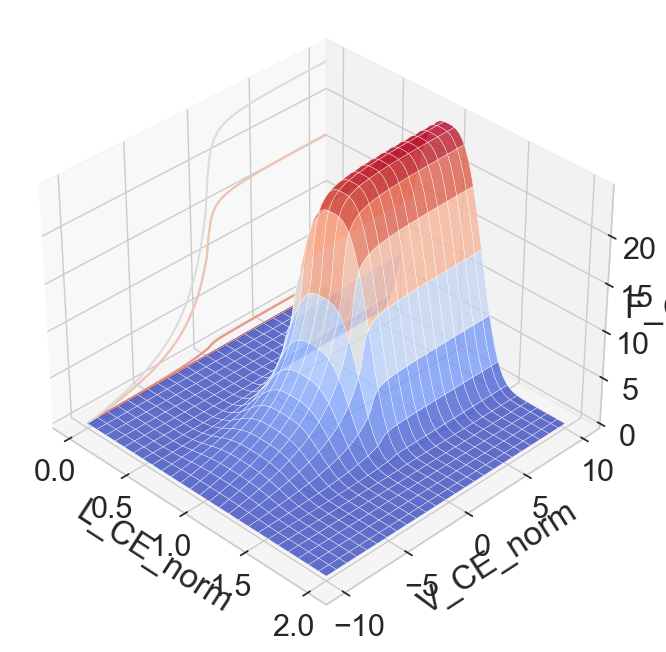

In [1732]:

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

F_max = 16.5
a = 1.0

def f_CE(L_CE_norm, V_CE_norm): 
    return a * F_max * f_L(L_CE_norm) * f_V(V_CE_norm)

L_CE_norm = np.linspace(0, 2, 100)
V_CE_norm = np.linspace(-10, 10, 100)
L_CE_norm, V_CE_norm = np.meshgrid(L_CE_norm, V_CE_norm)

f_CE = np.vectorize(f_CE)
F_CE = f_CE(L_CE_norm, V_CE_norm)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(L_CE_norm, V_CE_norm, F_CE, rstride=4, cstride=4, alpha=0.8, linewidth=0.25, cmap=cm.coolwarm)

cset = ax.contour(L_CE_norm, V_CE_norm, F_CE, zdir='x', offset=0, cmap=cm.coolwarm)

ax.view_init(35, -45)

ax.set_xlabel('L_CE_norm')
ax.set_ylabel('V_CE_norm')
ax.set_zlabel('F_CE')

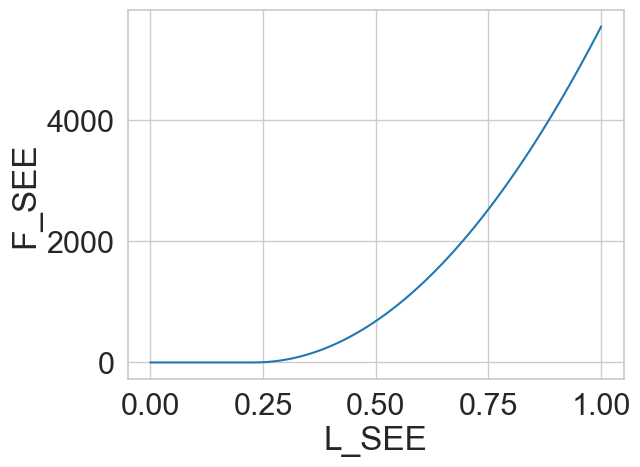

In [1733]:

L_SEE_rest = 0.23
epsilon_ref = 0.1825 * L_SEE_rest
K_0 =0.01
def f_SEE(L_SEE):
    epsilon = (L_SEE - L_SEE_rest)
    if epsilon > 0.0:
        return F_max * (epsilon / epsilon_ref)**2.0
    else:
        return 0.0

L_SEE = np.linspace(0, 1, 100)

f_SEE = np.vectorize(f_SEE)
F_SEE = f_SEE(L_SEE)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('L_SEE')
ax.set_ylabel('F_SEE')
ax.plot(L_SEE, F_SEE)

Text(0.5, 0, 'F_PEE')

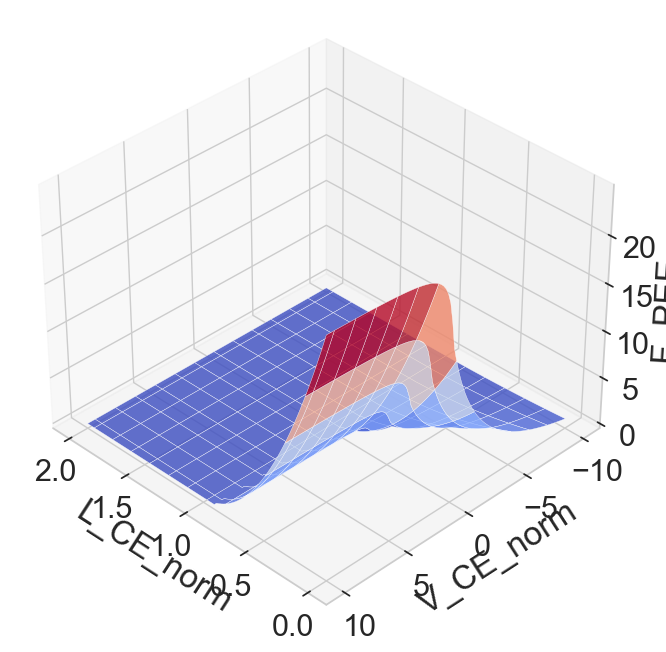

In [1734]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

w = 1
V_max = -12.0
K = 5.0
N = 1.5
Z = 0.9
l_pee = Z * L_CE_opt
def f_PEE(L_CE_norm, V_CE_norm): 
    if L_CE_norm < l_pee:
        return F_max  * (((L_CE_norm - L_CE_opt) / (L_CE_opt * w))**2) * f_V(V_CE_norm)
    else:
        return 0.0
    

L_CE_norm = np.linspace(0, 2, 100)
V_CE_norm = np.linspace(-10, 10, 100)
L_CE_norm, V_CE_norm = np.meshgrid(L_CE_norm, V_CE_norm)

f_PEE = np.vectorize(f_PEE)
F_PEE = f_PEE(L_CE_norm, V_CE_norm)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(L_CE_norm, V_CE_norm, F_PEE, rstride=8, cstride=8, alpha=0.8, linewidth=0.25, cmap=cm.coolwarm)

ax.view_init(35, 135)

ax.set_xlabel('L_CE_norm')
ax.set_ylabel('V_CE_norm')
ax.set_zlabel('F_PEE')

Text(0, 0.5, 'a / u')

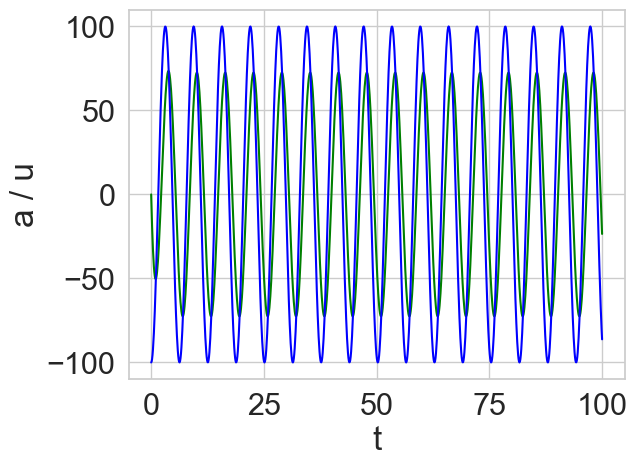

In [1735]:
#c_a = 0.01
c_a = 1
def da(u, a): 
    return c_a * (u - a)

    
t_series = np.linspace(0, 100, 1000)
u_series = np.sin(t_series - (np.pi / 2)) * 100

a_series = []
a = 0.0

prev_t = 0
for (t, u) in zip(t_series, u_series):
    dt = t - prev_t
    a += da(u, a) * dt
    prev_t = t
    a_series.append(a)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t_series, a_series, "g") # activation
ax.plot(t_series, u_series, "b") # neural input
ax.set_xlabel('t')
ax.set_ylabel('a / u')

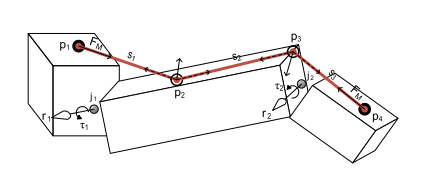

In [1736]:
Image(filename='force_application.png')

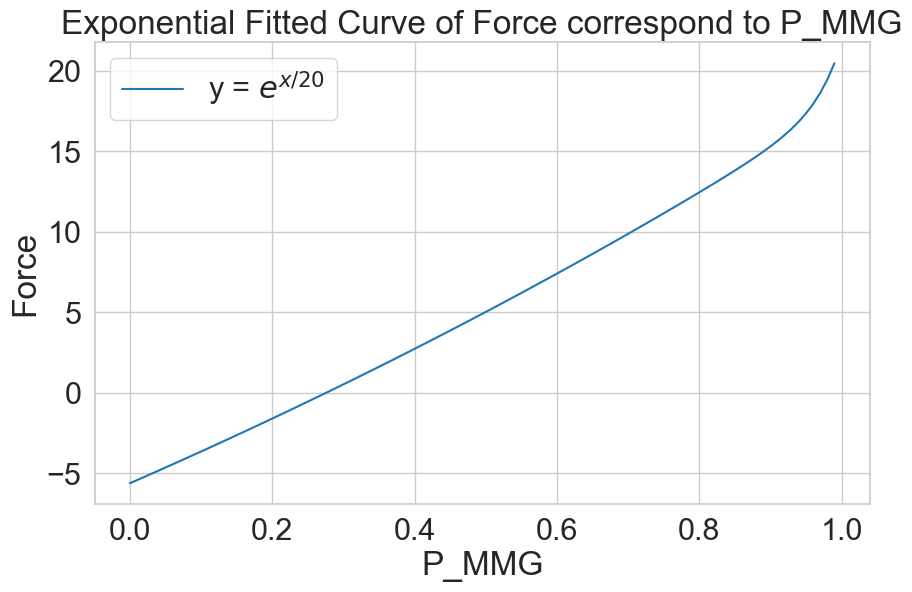

In [1737]:
#Curve fitting of the force output to the corresponding P_MMG
# Define the range and step
x = np.arange(0, 1, 0.01)

# Exponential function: y = a * e^(bx), where a=1 and b=log(2)/20 to double every 20 steps
a2 = pmmg_force_exp_double[0]
b2 = pmmg_force_exp_double[1]
c2 = pmmg_force_exp_double[2]
d2 = pmmg_force_exp_double[3]
e2 = pmmg_force_exp_double[4]
Force_y = a2 * np.exp(b2 * (-x)) + c2 * np.exp(d2 * (-x)) + e2


# Plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(x, Force_y, label="y = $e^{x/20}$")
plt.title("Exponential Fitted Curve of Force correspond to P_MMG")
plt.xlabel("P_MMG")
plt.ylabel("Force")
plt.legend()
plt.grid(True)
plt.show()

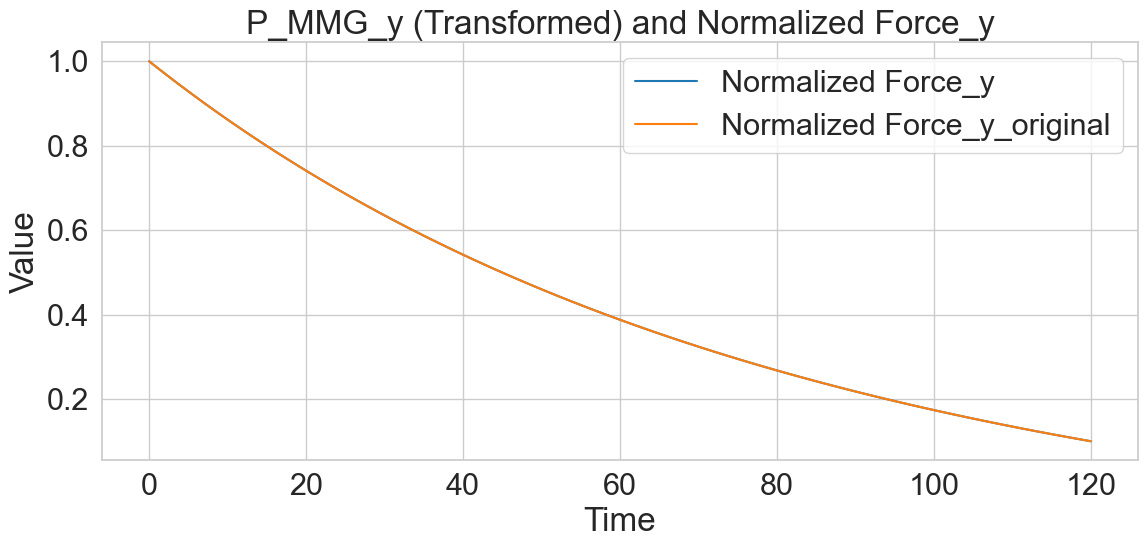

In [1738]:
# Given parameters
x_time = np.arange(0, 121, 1)  # Time range
a_PMMG = pmmg_params_exp[0]
b_PMMG = pmmg_params_exp[1]
c_PMMG = pmmg_params_exp[2]
d_PMMG = pmmg_params_exp[3]
# Original exponential function for P_MMG
def original_exponential(x, a, b, c, d):
    return a * np.exp(b * (-x + d)) + c

# Define a secondary exponential function to make the initial decline sharper
def secondary_exponential(x, p):
    return np.exp(p * x) 

# Parameters for the secondary exponential function
p = -0.0

# Calculate the original P_MMG_y values
P_MMG_y_original = original_exponential(x_time, a_PMMG, b_PMMG, c_PMMG, d_PMMG)

# Apply the secondary exponential function to make the decline sharper
P_MMG_y_transformed = P_MMG_y_original * secondary_exponential(x_time, p)

# Normalize the transformed P_MMG_y to start from 1 at x = 0
#P_MMG_y_transformed /= P_MMG_y_transformed[0]

# Parameters for the force curve
a_force = pmmg_force_exp_double[0]
b_force = pmmg_force_exp_double[1]
c_force = pmmg_force_exp_double[2]
d_force = pmmg_force_exp_double[3]
e_force = pmmg_force_exp_double[4]

# Calculate Force_y using the normalized transformed P_MMG_y values
# Assuming P_MMG_y values are already within a suitable range for the force calculation
Force_y = a_force * np.exp(b_force * (-P_MMG_y_transformed)) + e_force# c_force * np.exp(d_force * (-P_MMG_y_transformed)) + e_force
Force_y_original = a_force * np.exp(b_force * (-P_MMG_y_original)) + e_force# c_force * np.exp(d_force * (-P_MMG_y_transformed)) + e_force
# Normalize Force_y to range from 1 to 0.15
Force_y_min = 0.1
Force_y_max = 1.0
Force_y_normalized = (Force_y - Force_y.min()) / (Force_y.max() - Force_y.min()) * (Force_y_max - Force_y_min) + Force_y_min
Force_y_normalized_original = (Force_y_original - Force_y.min()) / (Force_y.max() - Force_y.min()) * (Force_y_max - Force_y_min) + Force_y_min
# Plotting the curves
plt.figure(figsize=(12, 6))

# Plot transformed P_MMG_y
#plt.plot(x_time, P_MMG_y_transformed, label='Transformed P_MMG_y', linestyle='--')

# Plot normalized Force_y
plt.plot(x_time, Force_y_normalized, label='Normalized Force_y', linestyle='-')
plt.plot(x_time, Force_y_normalized_original , label='Normalized Force_y_original', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('P_MMG_y (Transformed) and Normalized Force_y')

plt.tight_layout()
plt.show()


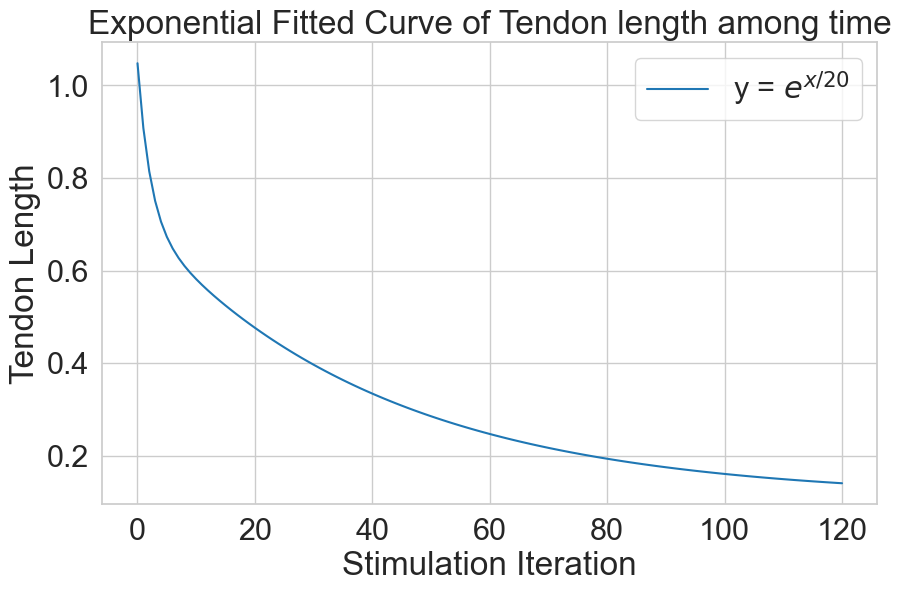

In [1739]:
#Curve fitting of the decay of the Tendon Length with time t
# Define the range and step
x = np.arange(0, 121, 1)

# Exponential function: y = a * e^(bx), where a=1 and b=log(2)/20 to double every 20 steps
a3 = force_params_exp[0] #2.2979258948
b3 = force_params_exp[1] #-0.0021572589
c3 = force_params_exp[2] #15.1929892742
d3 = force_params_exp[3] #0.0306490576
e3 = force_params_exp[4]
l_tendon_t = a3 * np.exp(b3* (-x)) + c3 * np.exp(d3 * (-x)) + e3

# Plotting the curve
plt.figure(figsize=(10, 6))
plt.plot(x, l_tendon_t, label="y = $e^{x/20}$")
plt.title("Exponential Fitted Curve of Tendon length among time")
plt.xlabel("Stimulation Iteration")
plt.ylabel("Tendon Length")
plt.legend()
plt.grid(True)
plt.show()

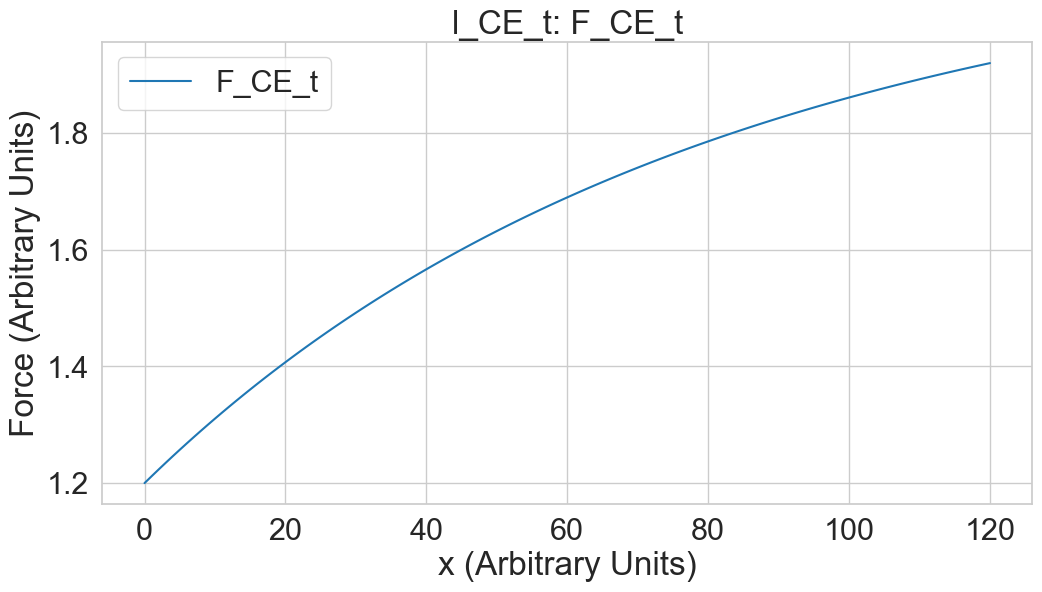

In [1740]:

l_muscle_total = 0.2 #Muscle Total length 0.4m
L_SEE_begin = 0.30
L_SEE_rest = 0.22
l_muscle_opt = 0.1
alpha_begin = np.radians(9) #begining degree
k_alpha = np.radians(9) #linear decreasing rate
F_begin = 24
x = np.arange(0, 121, 1)
L_SEE_t = L_SEE_rest + (L_SEE_begin - L_SEE_rest) * l_tendon_t
#l_CE_t = (l_muscle_total - ((L_SEE_begin - L_SEE_rest) * l_tendon_t)) / l_muscle_opt
l_CE_t = (l_muscle_total - ((L_SEE_begin - L_SEE_rest) * Force_y_normalized)) / l_muscle_opt
F_CE_t = F_max * f_L(l_CE_t)#f_CE(l_CE_t, 0)
F_PEE_t = f_PEE(l_CE_t, 0)
#F_M_t = F_CE_t #+ F_PEE_t


F_M_t = F_CE_t

alpha_t = alpha_begin + k_alpha * (F_M_t / F_begin) #Curve fitting of the decay of the Pennation angles with time t
F_M_tendon = F_M_t * np.cos(alpha_t)
F_SEE_t = f_SEE(L_SEE_t)
plt.figure(figsize=(12, 6))
plt.plot(x, l_CE_t, label='F_CE_t')
plt.title('l_CE_t: F_CE_t')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


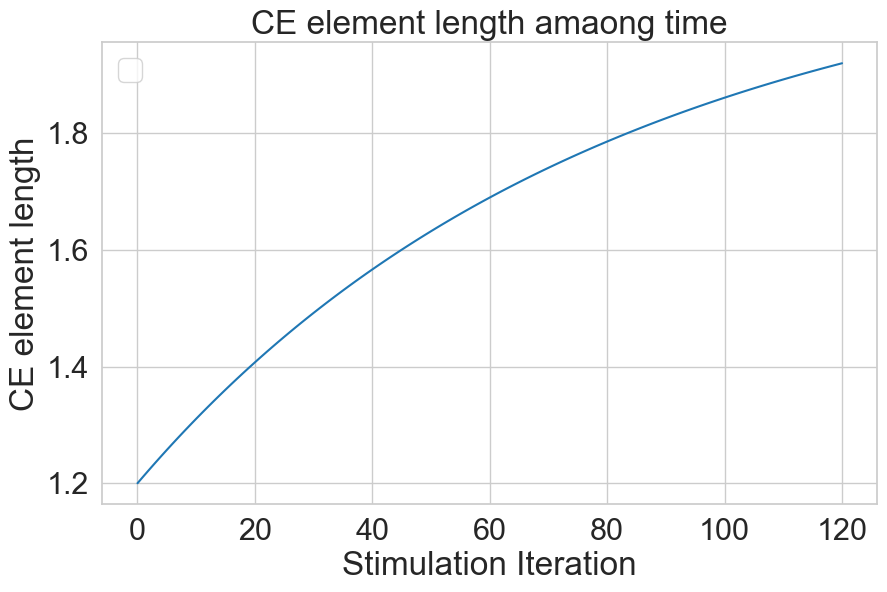

In [1741]:
plt.figure(figsize=(10, 6))
plt.plot(x, l_CE_t)
plt.title("CE element length amaong time")
plt.xlabel("Stimulation Iteration")
plt.ylabel("CE element length")
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


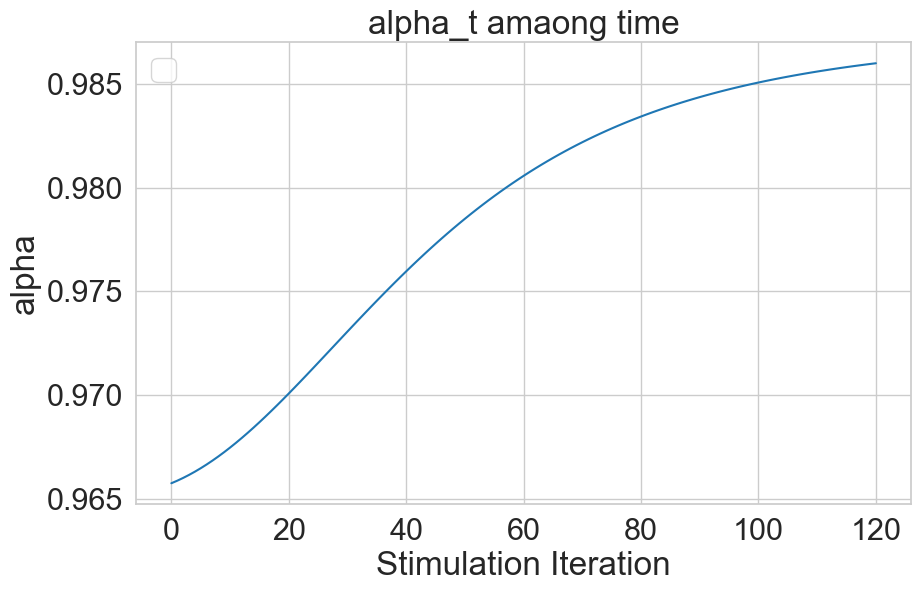

In [1742]:
plt.figure(figsize=(10, 6))
plt.plot(x, np.cos(alpha_t))
plt.title("alpha_t amaong time")
plt.xlabel("Stimulation Iteration")
plt.ylabel("alpha")
plt.legend()
plt.grid(True)
plt.show()

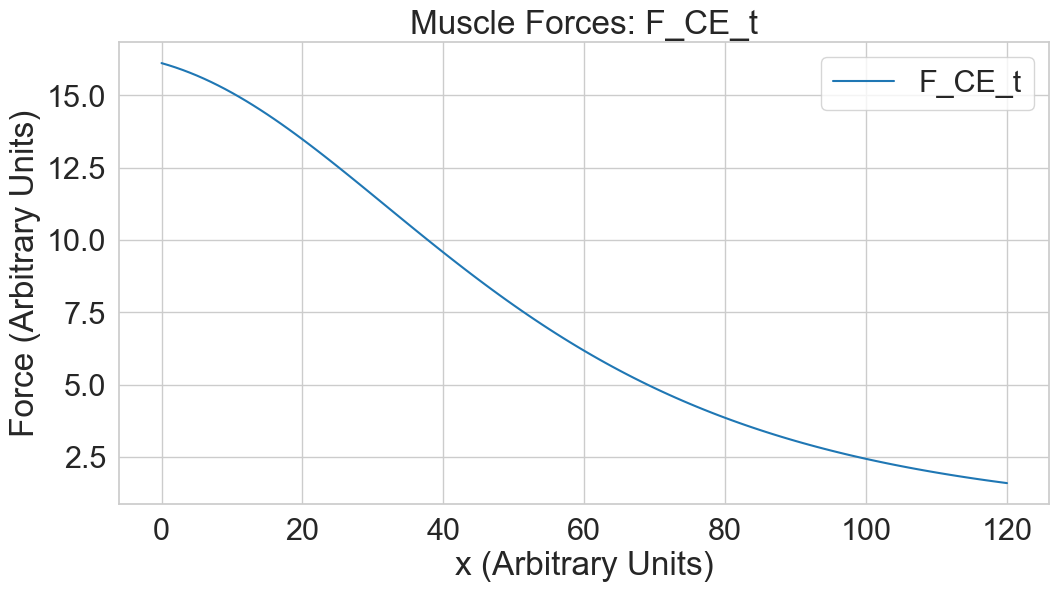

In [1743]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_CE_t, label='F_CE_t')
plt.title('Muscle Forces: F_CE_t')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

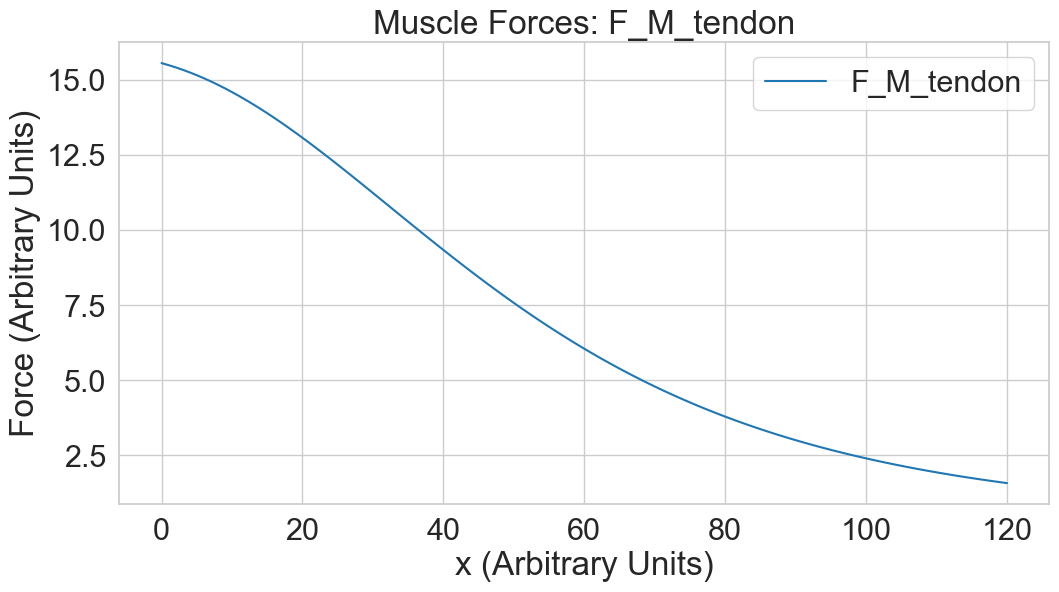

In [1744]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_M_tendon, label='F_M_tendon')
plt.title('Muscle Forces: F_M_tendon')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

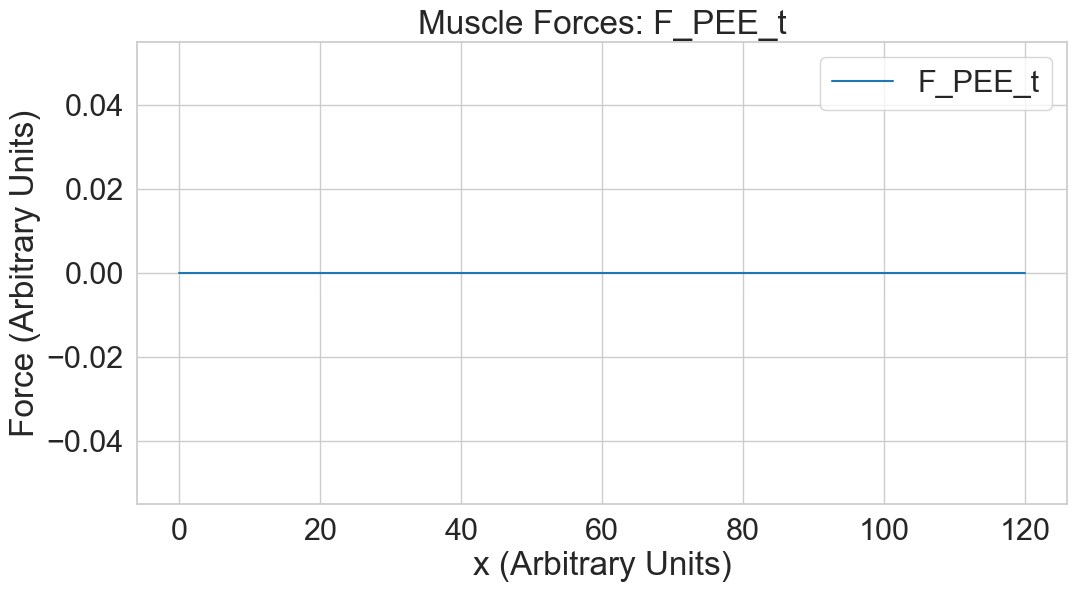

In [1745]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_PEE_t, label='F_PEE_t')
plt.title('Muscle Forces: F_PEE_t')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

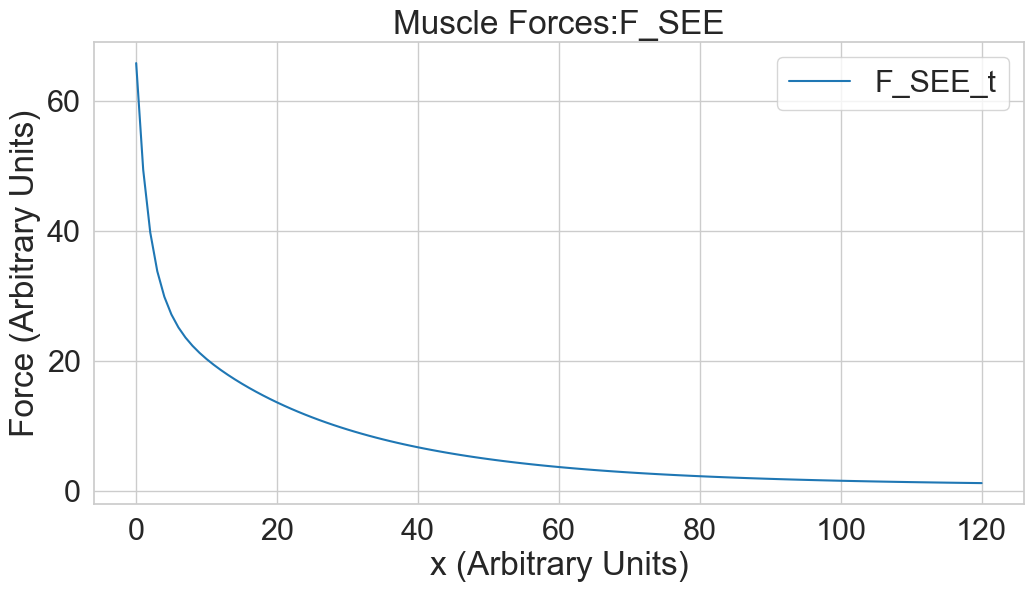

In [1746]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_SEE_t, label='F_SEE_t')
plt.title('Muscle Forces:F_SEE')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

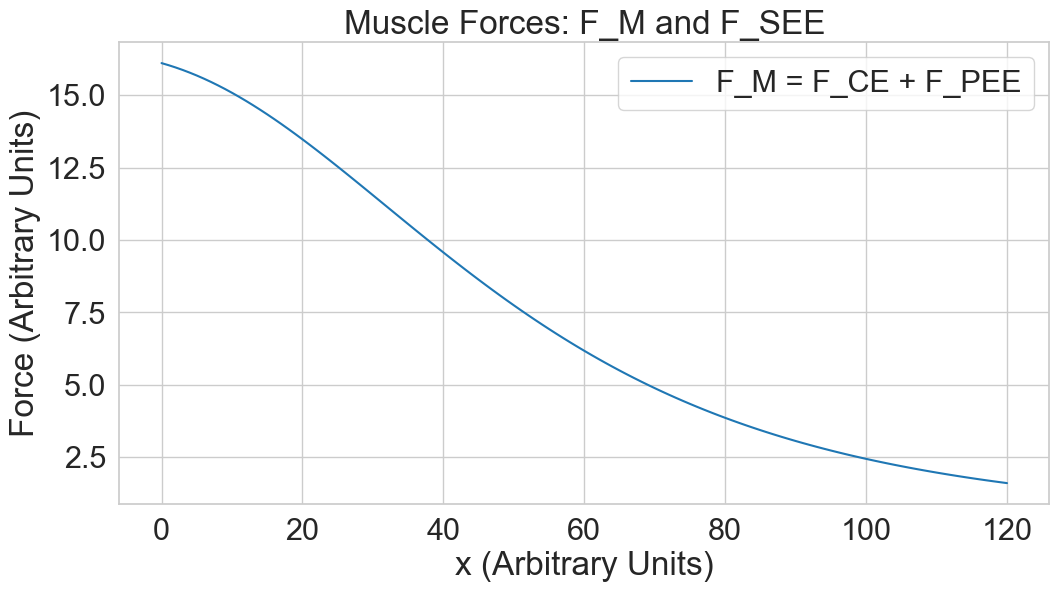

In [1747]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, F_M_t, label='F_M = F_CE + F_PEE')
#plt.plot(x, F_SEE_t, label='F_SEE', linestyle='--')
plt.title('Muscle Forces: F_M and F_SEE')
plt.xlabel('x (Arbitrary Units)')
plt.ylabel('Force (Arbitrary Units)')
plt.legend()
plt.grid(True)
plt.show()

In [1748]:
F_CE = f_CE(1.4,0)
F_PEE = f_PEE(1.4,0)
F_SEE = f_SEE(0.265)
F_M = F_CE + F_PEE

print(F_CE, F_PEE, F_SEE, F_M)

-320.0338752452057 0.0 18.963895878066346 -320.0338752452057


[9.42376067 0.02443327 5.34190989 0.46188996 1.70871756]

c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)
c:\anaconda3\lib\site-packages\pandas\core\indexes\base.py:969: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*new_inputs, **kwargs)


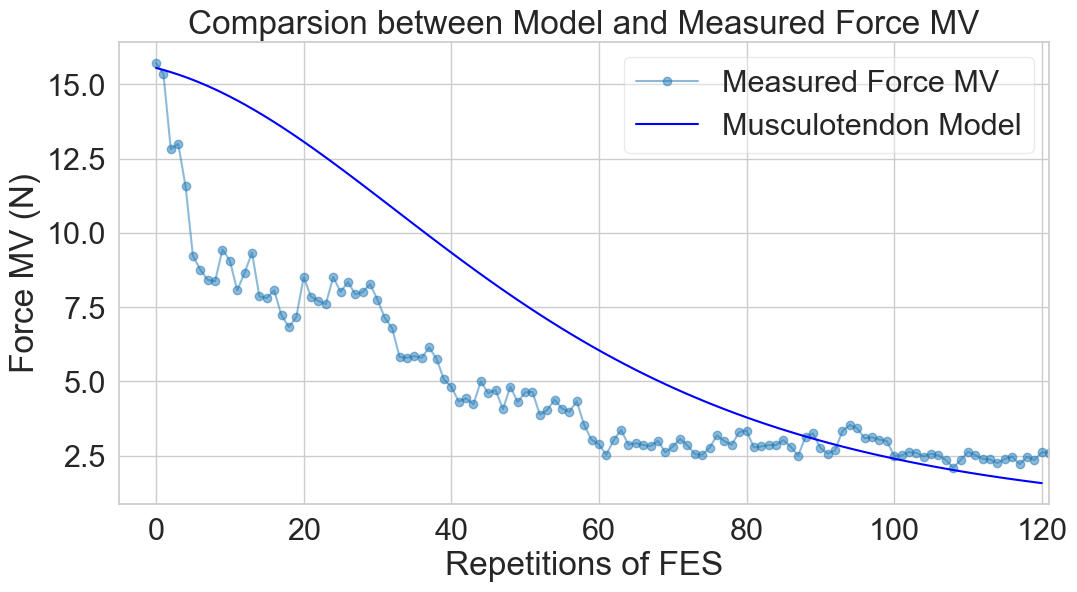

Pearson Correlation Coefficient PMMG: 0.9151177215816646
P-value PMMG: 9.043305436018413e-49
R²: -0.26888811395329837


In [1749]:
# Fit and plot data for each individual
#plt.figure(figsize=(12, 6))
for individual in individuals:
    plt.figure(figsize=(12, 6))
    file_path = os.path.join(base_directory, individual, force_suffix)
    df = pd.read_csv(file_path)
    time_values = df.index  # Use index as the x-axis
    emg_values = df.iloc[:, 0]  # Assuming the EMG values are in the first column
    # Rescale emg_values to the 0-1 range
    emg_min = emg_values.min()
    emg_max = emg_values.max()
    emg_values = (emg_values / emg_max) * 580 / 113 * 9.8 / 3.2

 
    # Fit different models
    #force_params_linear, _ = curve_fit(linear_model, time_values, emg_values, maxfev=10000)
    #force_params_poly_2nd, _ = curve_fit(polynomial_model_2nd, time_values, emg_values, maxfev=10000)
    #force_params_poly_3rd, _ = curve_fit(polynomial_model_3rd, time_values, emg_values, maxfev=10000)
    force_params_fitting, _ = curve_fit(exponential_model_double, time_values, emg_values, maxfev=10000)
    #force_params_log, _ = curve_fit(logarithmic_model, time_values, emg_values, maxfev=10000)
    
    np.set_printoptions(suppress = True)
    #print(force_params_linear)
    #print(force_params_poly_2nd)
    #print(force_params_poly_3rd)
    print(force_params_fitting)
    #print(force_params_log)
    # Plot data
    plt.plot(time_values, emg_values, marker = 'o', linestyle = '-', label='Measured Force MV', alpha=0.5)

    # Plot fitted lines
    #plt.plot(time_values, linear_model(time_values, *force_params_linear), label='Linear Fit', color = 'blue', linewidth=2)
    #plt.plot(time_values, polynomial_model_2nd(time_values, *force_params_poly_2nd), label='2nd Poly Fit', color = 'red', linewidth=2)
    #plt.plot(time_values, polynomial_model_3rd(time_values, *force_params_poly_3rd), label='3rd Polu Fit', color = 'green', linewidth=2)
    #plt.plot(time_values, exponential_model_double(time_values, *force_params_fitting), label='Double Exponential Fit')
    #plt.plot(time_values, logarithmic_model(time_values, *force_params_log), label=f'{individual} Logarithmic Fit')
    # Adjust the legend's size and location
    
    plt.plot(x, F_M_tendon, label='Musculotendon Model', color = 'blue')
    plt.xlim(-5, 121)
    plt.title('Comparsion between Model and Measured Force MV')
    plt.xlabel('Repetitions of FES')
    plt.ylabel('Force MV (N)')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.4)
    plt.grid(True)
    #plt.savefig('Different Fitting Cruves of Force MV.pdf', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.savefig('Comparsion between Model and Measured Force MV.png', bbox_inches='tight', dpi=300)  # Adjust the path and file name as needed
    plt.show()

    np.savetxt('P_MMG_prediction.txt', F_M_tendon, fmt='%f')
    
    min_length = min(len(emg_values), len(F_M_tendon))
    emg_values = emg_values[:min_length]
    F_M_tendon = F_M_tendon[:min_length]
    # Rescale emg_values to the 0-1 range
    correlation, p_value = pearsonr(emg_values, F_M_tendon)
    r2 = r2_score(emg_values, F_M_tendon)
    print(f"Pearson Correlation Coefficient PMMG: {correlation}")
    print(f"P-value PMMG: {p_value}")
    print(f"R²: {r2}")

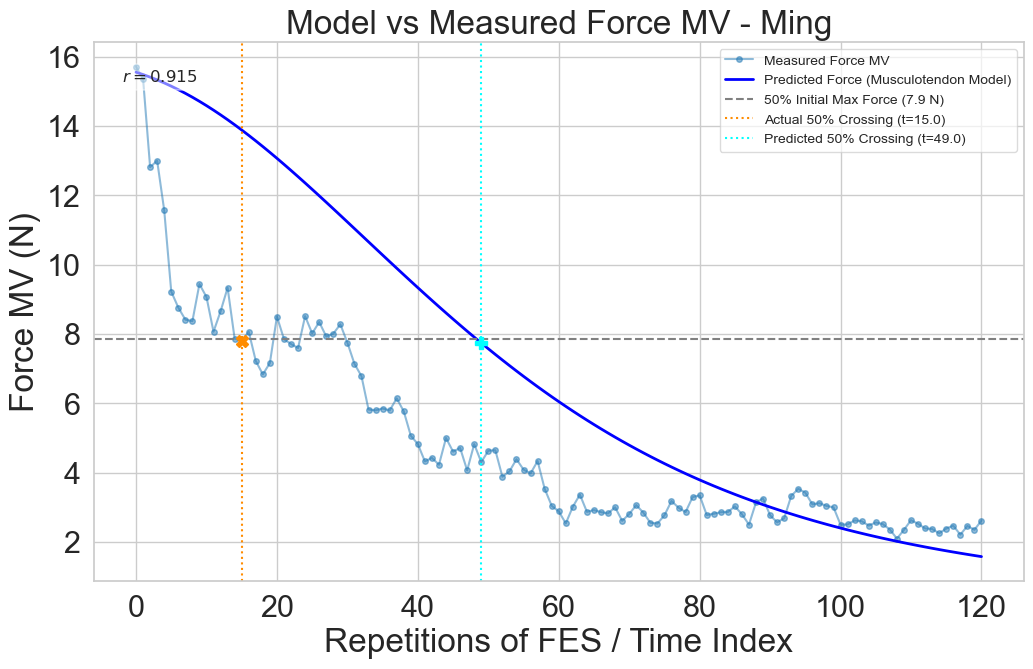


Results for Ming:
  Initial Max Force (Scaled): 15.72
  50% Threshold: 7.86
  Actual 50% Crossing Time: 15.00
  Predicted 50% Crossing Time: 49.00
  Lead Time (Actual - Predicted): -34.00
  Pearson Correlation Coefficient: 0.915
  P-value: 0.0000
  R²: -0.269


In [1750]:
# Fit and plot data for each individual
for individual in individuals:
    plt.figure(figsize=(12, 7)) # Slightly larger figure for text
    ax = plt.gca() # Get current axes for text placement later
    # Apply scaling
    measured_force_scaled = emg_values # Your scaling formula

    # --- Predicted Force ('F_M_tendon' from your code) ---
    # Assuming F_M_tendon is calculated or loaded here corresponding to time_values
    # Example: Using your fitting model - replace with your actual prediction source
    
    min_length = min(len(measured_force_scaled), len(F_M_tendon))
    measured_force_final = measured_force_scaled[:min_length]
    F_M_tendon_final = F_M_tendon[:min_length]
    time_values_final = time_values[:min_length]
    # ----------------------------------------------------------------

    # --- Plotting Measured and Predicted Force ---
    ax.plot(time_values_final, measured_force_final, marker='o', linestyle='-', label='Measured Force MV', alpha=0.5, markersize=4) # Smaller markers
    ax.plot(time_values_final, F_M_tendon_final, label='Predicted Force (Musculotendon Model)', color='blue', linewidth=2) # Use time_values_final for x-axis

    # --- Calculate and Plot 50% Threshold Line ---
    # Assumption: The max of the *entire* scaled series is a reasonable estimate
    # of the initial max force for calculating the 50% threshold.
    # If not, adjust this calculation (e.g., use first value, or max of first few points).
    initial_max_force = np.max(measured_force_final)
    # Or potentially: initial_max_force = measured_force_final[0] # If it always starts at max
    threshold_50 = 0.5 * initial_max_force
    ax.axhline(y=threshold_50, color='grey', linestyle='--', linewidth=1.5, label=f'50% Initial Max Force ({threshold_50:.1f} N)')

    # --- Find and Highlight Crossing Times ---
    time_actual_cross = np.nan
    indices_actual_cross = np.where(measured_force_final < threshold_50)[0]
    if len(indices_actual_cross) > 0:
        first_actual_cross_idx = indices_actual_cross[0]
        # Find the corresponding time value
        time_actual_cross = time_values_final[first_actual_cross_idx]
        ax.axvline(x=time_actual_cross, color='darkorange', linestyle=':', linewidth=1.5,
                   label=f'Actual 50% Crossing (t={time_actual_cross:.1f})')
        # Optional: Add a marker at the crossing point
        ax.plot(time_actual_cross, measured_force_final[first_actual_cross_idx], 'X', color='darkorange', markersize=8)

    time_predicted_cross = np.nan
    indices_predicted_cross = np.where(F_M_tendon_final < threshold_50)[0]
    if len(indices_predicted_cross) > 0:
        first_predicted_cross_idx = indices_predicted_cross[0]
        # Find the corresponding time value
        time_predicted_cross = time_values_final[first_predicted_cross_idx]
        ax.axvline(x=time_predicted_cross, color='cyan', linestyle=':', linewidth=1.5,
                   label=f'Predicted 50% Crossing (t={time_predicted_cross:.1f})')
        # Optional: Add a marker at the crossing point
        ax.plot(time_predicted_cross, F_M_tendon_final[first_predicted_cross_idx], 'P', color='cyan', markersize=8) # 'P' for plus sign marker


    # --- Calculate and Add Correlation Text ---
    correlation, p_value = pearsonr(measured_force_final, F_M_tendon_final)
    r2 = r2_score(measured_force_final, F_M_tendon_final) # If needed

    # Add text to the plot (top-left corner)
    # Using axes coordinates (0 to 1 for x and y) for placement
    ax.text(0.03, 0.95, f'$r = {correlation:.3f}$',
            transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

    # --- Plot Formatting ---
    # ax.set_xlim(-5, 130) # Keep or adjust as needed
    ax.set_title(f'Model vs Measured Force MV - {individual}') # Add individual ID to title
    ax.set_xlabel('Repetitions of FES / Time Index') # Clarify x-axis label
    ax.set_ylabel('Force MV (N)') # Assuming scaled values are in N
    ax.legend(loc='upper right', bbox_to_anchor=(1, 1), framealpha=0.7, fontsize=10) # Adjust legend
    ax.grid(True)

    # --- Saving ---
    plt.savefig(f'Comparsion_Model_Measured_Force_{individual}.png', bbox_inches='tight', dpi=300) # Individual file names
    plt.show()

    # --- Print Stats (Optional) ---
    print(f"\nResults for {individual}:")
    print(f"  Initial Max Force (Scaled): {initial_max_force:.2f}")
    print(f"  50% Threshold: {threshold_50:.2f}")
    print(f"  Actual 50% Crossing Time: {time_actual_cross:.2f}" if not np.isnan(time_actual_cross) else "  Actual 50% Threshold Not Crossed")
    print(f"  Predicted 50% Crossing Time: {time_predicted_cross:.2f}" if not np.isnan(time_predicted_cross) else "  Predicted 50% Threshold Not Crossed")
    if not np.isnan(time_actual_cross) and not np.isnan(time_predicted_cross):
         print(f"  Lead Time (Actual - Predicted): {time_actual_cross - time_predicted_cross:.2f}")
    print(f"  Pearson Correlation Coefficient: {correlation:.3f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  R²: {r2:.3f}")

    # --- Saving Prediction (Optional - moved outside loop if aggregating) ---
    # np.savetxt(f'P_MMG_prediction_{individual}.txt', F_M_tendon_final, fmt='%f')